# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

In [30]:
df = df[['posse_de_veiculo', 'posse_de_imovel', 'mau', 'renda']]

In [31]:
df.head()

,posse_de_veiculo,posse_de_imovel,mau,renda
0,False,True,False,3369.24
1,True,True,False,6096.14
2,True,True,False,5658.98
3,True,False,False,7246.69
4,False,False,False,4017.37


In [32]:
import pandas as pd
import statsmodels.api as sm

# Convertendo as variáveis categóricas em variáveis dummy
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(int)
df['mau'] = df['mau'].astype(int)

In [33]:
df

,posse_de_veiculo,posse_de_imovel,mau,renda
0,0,1,0,3369.24
1,1,1,0,6096.14
2,1,1,0,5658.98
3,1,0,0,7246.69
4,0,0,0,4017.37
...,...,...,...,...
14995,1,1,0,1193.29
14996,1,1,0,2519.18
14997,1,1,0,1586.85
14998,0,1,0,6975.39


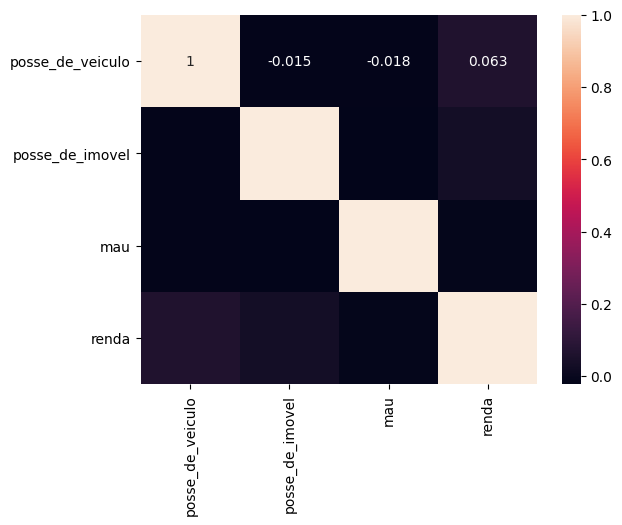

In [34]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)


In [ ]:
plt.show()

In [35]:
# Adicionando uma constante ao DataFrame
df = sm.add_constant(df)

# Definindo a variável dependente (y) e as variáveis independentes (X)
y = df['renda']
X = df[['const', 'posse_de_veiculo', 'posse_de_imovel']]

# Realizando a análise de regressão
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     37.44
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           6.05e-17
Time:                        16:35:48   Log-Likelihood:            -1.4785e+05
No. Observations:               15000   AIC:                         2.957e+05
Df Residuals:                   14997   BIC:                         2.957e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4184.9384     72.720  